In [18]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from psi_praktikum.__main__ import *

## Find the parameters of the fit between TDC bin numbers and times.

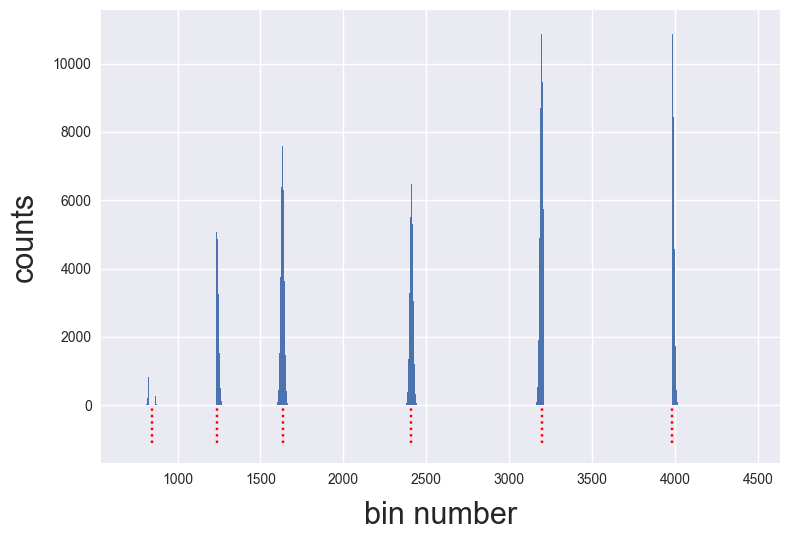

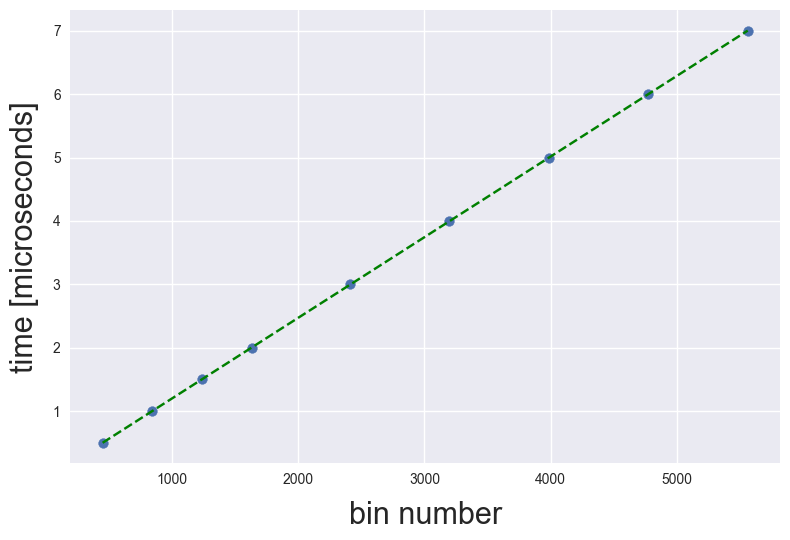

The parameters are [p_1, p_2]=[ 0.00127266 -0.07273329]


In [55]:
parameters = fit_calibration(
    "TimeCalibration_delaytrigger_05to7us.Spe",
    times = [
        0.5,
        1,
        1.5,
        2,
        3,
        4,
        5,
        6,
        7,
    ],
    visualize=True,
)

print(f"The parameters are [p_1, p_2]={parameters}")

## Test the fit on a simulated distribution

popt=array([2.29663027, 0.43542055])


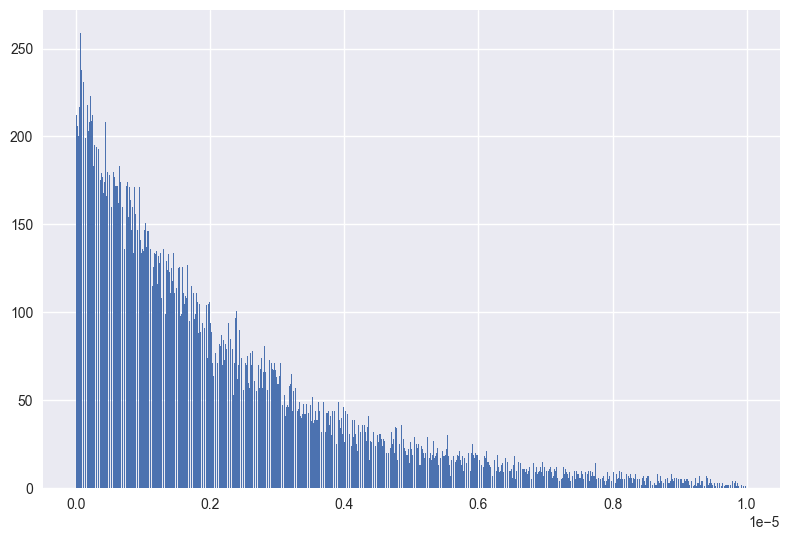

In [21]:
fit_simulated(250_000)

## Fit to the real data

[2.42681068 2.42545609]


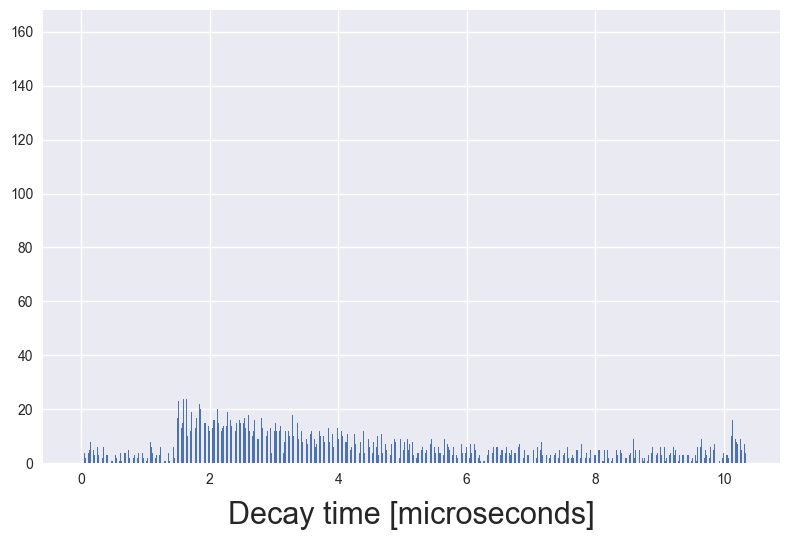

In [57]:
fit_data("stop_S6andS7_delay_1_5_mus_fs12_50and100mm_30min.Spe")